In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA

from scipy.cluster.hierarchy import linkage, dendrogram

from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier

import joblib

pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting seed for reproducability
SEED = 42

In [3]:
DATA_PATH = ''

# Load file
data = pd.read_csv(os.path.join(DATA_PATH, 'Telco Data.csv'))

# Previewing data dataset
data.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_X
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85000,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95000,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85000,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30000,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70000,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65000,820.5,Yes,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10000,1949.4,No,0


In [4]:
# Checking size and shape of dataset
data.shape

(7043, 22)

In [5]:
# Data statistical summary
data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_X
count,7043,7043,7043.00000,7043,7043,7043.00000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043.00000,7043,7043,7043.00000
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,2,4,NaN,6531,2,NaN
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No,NaN
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3473,2810,2785,3875,4171,2365,NaN,11,5174,NaN
mean,NaN,NaN,0.16215,NaN,NaN,32.37115,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64.76169,NaN,NaN,0.26537
std,NaN,NaN,0.36861,NaN,NaN,24.55948,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.09005,NaN,NaN,0.44156
min,NaN,NaN,0.00000,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.25000,NaN,NaN,0.00000
25%,NaN,NaN,0.00000,NaN,NaN,9.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.50000,NaN,NaN,0.00000
50%,NaN,NaN,0.00000,NaN,NaN,29.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.35000,NaN,NaN,0.00000
75%,NaN,NaN,0.00000,NaN,NaN,55.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.85000,NaN,NaN,1.00000


In [6]:
# Checking for missing values
data.isnull().sum().any()

False

In [7]:
# Dropping customerID column
data = data.drop(['customerID', 'Churn'], axis = 1)

In [8]:
# Printing dataset columns
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn_X'],
      dtype='object')


In [9]:
# Checking the unique in the gender (Whether the customer is a male or a female) column to find outliers/invalid data
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
# Checking the unique in the SeniorCitizen (Whether the customer is a senior citizen or not (1, 0)) column to find outliers/invalid data
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [11]:
# Checking the unique in the Partner (if they are married or not) column to find outliers/invalid data
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# Checking the unique in the Dependents column (if they have children (or similar dependents) or not) to find outliers/invalid data
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# Checking the unique in the tenure column (Number of months the customer has stayed with the company) to find outliers/invalid data
data['tenure'].unique() #Using sorted(data['tenure'].unique()) will  produce an ordered list of the unique values in the column, however, they would be on separate lines and would take too much screen space for the task

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [14]:
# Checking the unique in the PhoneService column (Whether the customer has a phone service or not (Yes, No)) to find outliers/invalid data
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Checking the unique in the MultipleLines column (Whether the customer has multiple lines or not (Yes, No, No phone service)) to find outliers/invalid data
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [16]:
# Checking the unique in the InternetService (Customer’s internet service provider (DSL, Fiber optic, No) column to find outliers/invalid data
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [17]:
# Checking the unique in the OnlineSecurity (Whether the customer has online security or not (Yes, No, No internet service)) column to find outliers/invalid data
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
# Checking the unique in the OnlineBackup (Whether the customer has online backup or not (Yes, No, No internet service)) column to find outliers/invalid data
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [19]:
# Checking the unique in the DeviceProtection (Whether the customer has device protection or not (Yes, No, No internet service)) column to find outliers/invalid data
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
# Checking the unique in the TechSupport (Whether the customer has tech support or not (Yes, No, No internet service)) column to find outliers/invalid data
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
# Checking the unique in the StreamingTV (Whether the customer has streaming TV or not (Yes, No, No internet service)) column to find outliers/invalid data
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
# Checking the unique in the StreamingMovies (Whether the customer has streaming movies or not (Yes, No, No internet service)) column to find outliers/invalid data
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
# Checking the unique in the Contract (The contract term of the customer (Month-to-month, One year, Two year)) column to find outliers/invalid data
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [24]:
# Checking the unique in the PaperlessBilling (Whether the customer has paperless billing or not (Yes, No)) column to find outliers/invalid data
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
# Checking the unique in the PaymentMethod (The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))) column to find outliers/invalid data
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [26]:
# Checking the unique in the MonthlyCharges (The amount charged to the customer monthly) column to find outliers/invalid data
sorted(data['MonthlyCharges'].unique())

[18.25,
 18.4,
 18.55,
 18.7,
 18.75,
 18.8,
 18.85,
 18.9,
 18.95,
 19.0,
 19.05,
 19.1,
 19.15,
 19.2,
 19.25,
 19.3,
 19.35,
 19.4,
 19.45,
 19.5,
 19.55,
 19.6,
 19.65,
 19.7,
 19.75,
 19.8,
 19.85,
 19.9,
 19.95,
 20.0,
 20.05,
 20.1,
 20.15,
 20.2,
 20.25,
 20.3,
 20.35,
 20.4,
 20.45,
 20.5,
 20.55,
 20.6,
 20.65,
 20.7,
 20.75,
 20.8,
 20.85,
 20.9,
 20.95,
 21.0,
 21.05,
 21.1,
 21.15,
 21.2,
 21.25,
 21.3,
 21.45,
 22.95,
 23.05,
 23.15,
 23.3,
 23.4,
 23.45,
 23.5,
 23.55,
 23.6,
 23.65,
 23.75,
 23.8,
 23.85,
 23.9,
 23.95,
 24.0,
 24.05,
 24.1,
 24.15,
 24.2,
 24.25,
 24.3,
 24.35,
 24.4,
 24.45,
 24.5,
 24.55,
 24.6,
 24.65,
 24.7,
 24.75,
 24.8,
 24.85,
 24.9,
 24.95,
 25.0,
 25.05,
 25.1,
 25.15,
 25.2,
 25.25,
 25.3,
 25.35,
 25.4,
 25.45,
 25.5,
 25.55,
 25.6,
 25.65,
 25.7,
 25.75,
 25.8,
 25.85,
 25.9,
 25.95,
 26.0,
 26.05,
 26.1,
 26.2,
 26.25,
 26.3,
 26.35,
 26.4,
 26.45,
 26.5,
 26.8,
 26.9,
 28.45,
 28.5,
 28.6,
 29.05,
 29.1,
 29.15,
 29.2,
 29.25,
 29.3,
 29

In [27]:
# Checking the unique in the TotalCharges (The total amount charged to the customer) column to find outliers/invalid data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').astype(float) #Converting from object to float to get a better view of the range
print(sorted(data['TotalCharges'].unique()))

[18.9, 19.0, 19.05, 19.15, 19.25, 19.45, 19.55, 19.6, 19.75, 19.85, 19.9, 20.0, 20.05, 20.15, 20.2, 20.25, 20.4, 20.45, 20.65, 20.75, 20.8, 24.8, 25.25, 25.35, 25.4, 29.85, 29.95, 30.2, 33.6, 34.75, 35.45, 35.9, 38.0, 38.8, 39.65, 40.2, 44.0, 44.4, 44.8, 45.25, 45.3, 45.6, 45.65, 45.7, 47.7, 48.55, 49.05, 49.3, 49.9, 50.65, 52.2, 55.0, 55.05, 55.2, 57.2, 61.35, 61.7, 62.25, 62.9, 69.55, 70.0, 70.45, 70.6, 71.1, 72.1, 73.6, 74.35, 74.6, 74.7, 75.05, 75.1, 75.3, 79.35, 79.9, 80.0, 80.55, 81.25, 82.15, 83.75, 84.5, 84.6, 85.0, 85.1, 85.7, 89.05, 89.3, 89.5, 89.55, 90.85, 91.1, 92.5, 92.75, 94.15, 96.05, 97.0, 100.2, 100.9, 108.15, 112.75, 113.5, 113.85, 114.1, 114.15, 119.5, 131.05, 132.2, 132.25, 135.2, 137.1, 137.6, 139.05, 139.4, 141.5, 143.65, 144.15, 145.15, 146.6, 147.15, 151.65, 155.8, 161.5, 161.95, 164.3, 167.5, 168.15, 168.2, 174.45, 176.3, 177.4, 178.7, 179.35, 181.5, 181.65, 184.65, 186.3, 190.5, 191.05, 193.05, 195.65, 202.15, 202.25, 202.9, 204.55, 208.45, 208.85, 214.75, 21

In [28]:
# Top 10 correlated features to the target
data = pd.DataFrame(data)
#top10_corrs = abs(data.corr()['Churn']).sort_values(ascending = False).head(11)
#top10_corrs
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn_X'],
      dtype='object')

In [29]:
# Performing one-hot encoding for the gender column
data.columns = data.columns.str.strip()
data_oh = pd.get_dummies(data, columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [30]:
data_oh.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_X',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-m

In [31]:
data_oh.head(7)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_X,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85000,29.85000,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95000,1889.50000,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85000,108.15000,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30000,1840.75000,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70000,151.65000,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,0,8,99.65000,820.50000,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
6,0,22,89.10000,1949.40000,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [32]:
unit_cols = ['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

unit_cols_2 = {0:'gender_Female', 1:'gender_Male', 2:'Partner_No', 3:'Partner_Yes',
       4:'Dependents_No', 5:'Dependents_Yes', 6:'PhoneService_No',
       7:'PhoneService_Yes', 8:'PhoneService_No', 9:'PhoneService_Yes',
       10:'PaperlessBilling_No', 11:'PaperlessBilling_Yes'}

unit_cols_3 = {0:'MultipleLines_No', 1:'MultipleLines_No phone service',
       2:'MultipleLines_Yes', 3:'InternetService_DSL',
       4:'InternetService_Fiber optic', 5:'InternetService_No',
       6:'OnlineSecurity_No', 7:'OnlineSecurity_No internet service',
       8:'OnlineSecurity_Yes', 9:'OnlineBackup_No',
       10:'OnlineBackup_No internet service', 11:'OnlineBackup_Yes',
       12:'DeviceProtection_No', 13:'DeviceProtection_No internet service',
       14:'DeviceProtection_Yes', 15:'TechSupport_No',
       16:'TechSupport_No internet service', 17:'TechSupport_Yes', 18:'StreamingTV_No',
       19:'StreamingTV_No internet service', 20:'StreamingTV_Yes',
       21:'StreamingMovies_No', 22:'StreamingMovies_No internet service',
       23:'StreamingMovies_Yes', 24:'Contract_Month-to-month', 25:'Contract_One year',
       26:'Contract_Two year'}

unit_cols_4 = {0:'PaymentMethod_Bank transfer (automatic)',
       1:'PaymentMethod_Credit card (automatic)',
       2:'PaymentMethod_Electronic check', 3:'PaymentMethod_Mailed check'}

for i in unit_cols:
    data_oh[i] = data_oh[i].astype('int64')

In [33]:
uc_list_2 = list(unit_cols_2.keys())
uc_list_3 = list(unit_cols_3.keys())
uc_list_4 = list(unit_cols_4.keys())



In [34]:
data_oh.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn_X                                      int64
gender_Female                                int64
gender_Male                                  int64
Partner_No                                   int64
Partner_Yes                                  int64
Dependents_No                                int64
Dependents_Yes                               int64
PhoneService_No                              int64
PhoneService_Yes                             int64
PhoneService_No                              int64
PhoneService_Yes                             int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [35]:
data_oh =  pd.DataFrame(data_oh)

In [36]:
unit_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

unit_col_2 = ['Gender', 'Partner', 'PhoneService', 'PaperlessBilling']

unit_col_3 = ['MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract']

unit_col_4 = ['PaymentMethod']



def map_col_2(row):
    for i in unit_col_2:
        for k in uc_list_2:
            if row[unit_cols_2[k]] == 1:
                return 0
            elif row[unit_cols_2[k + 1]] == 1:
                return 1
            k += 2
         
def map_col_3(row):
    for i in unit_col_3:
        for k in uc_list_3:
            if row[unit_cols_3[k]] == 1:
                return 0
            elif row[unit_cols_3[k + 1]] == 1:
                return 1
            elif row[unit_cols_3[k + 2]] == 1:
                return 2
            k += 3
  
def map_col_4(row):
    for i in unit_col_4:
        for k in uc_list_4:
            if row[unit_cols_4[k]] == 1:
                return 0
            elif row[unit_cols_4[k + 1]] == 1:
                return 1
            elif row[unit_cols_4[k + 2]] == 1:
                return 2
            elif row[unit_cols_4[k + 3]] == 1:
                return 3
            k += 4


In [37]:
for i in unit_col_2:
    data_oh[i] = data_oh.apply(map_col_2, axis = 1)

for i in unit_col_3:
    data_oh[i] = data_oh.apply(map_col_3, axis = 1)

for i in unit_col_4:
    data_oh[i] = data_oh.apply(map_col_4, axis = 1)

data_oh.head(7)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_X,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,0,1,29.85000,29.85000,0,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,2
1,0,34,56.95000,1889.50000,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,3
2,0,2,53.85000,108.15000,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,3
3,0,45,42.30000,1840.75000,0,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,0
4,0,2,70.70000,151.65000,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2
5,0,8,99.65000,820.50000,1,1,0,1,0,1,...,2,2,2,2,2,2,2,2,2,2
6,0,22,89.10000,1949.40000,0,0,1,1,0,0,...,2,2,2,2,2,2,2,2,2,1


In [38]:
# Dropping customerID column
data = data_oh.drop(unit_cols, axis = 1)
data.head(7)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_X,Gender,Partner,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,0,1,29.85000,29.85000,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2
1,0,34,56.95000,1889.50000,0,1,1,1,1,0,0,0,0,0,0,0,0,0,3
2,0,2,53.85000,108.15000,1,1,1,1,1,0,0,0,0,0,0,0,0,0,3
3,0,45,42.30000,1840.75000,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,0,2,70.70000,151.65000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5,0,8,99.65000,820.50000,1,0,0,0,0,2,2,2,2,2,2,2,2,2,2
6,0,22,89.10000,1949.40000,0,1,1,1,1,2,2,2,2,2,2,2,2,2,1


In [39]:
# Splitting the data set; X contains every feature except the target feature, y contains the target feature
data = data.dropna(subset = data.columns)
X_ = data.drop(['Churn_X'], axis = 1)
y_ = data['Churn_X']

In [40]:
# Splitting the data into training and testing sets
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.2, random_state = SEED)

In [41]:
# Logistic Regression 
C = {"Very strong": 0.01,
     "Moderately strong": 0.1,
     "Medium": 1,
     "Moderately weak": 10,
     "Very weak": 100}

for k, v in C.items():
    lr_reg = LogisticRegression(C = v)
    lr_reg.fit(X_train_, y_train_)
    print("Train score with ", k, " regularization: ", lr_reg.score(X_train_, y_train_))
    print("Test score with ", k, " regularization: ", lr_reg.score(X_test_, y_test_), "\n")

Train score with  Very strong  regularization:  0.7937777777777778
Test score with  Very strong  regularization:  0.7803837953091685 

Train score with  Moderately strong  regularization:  0.7907555555555555
Test score with  Moderately strong  regularization:  0.7789623312011372 

Train score with  Medium  regularization:  0.7902222222222223
Test score with  Medium  regularization:  0.7796730632551528 

Train score with  Moderately weak  regularization:  0.7900444444444444
Test score with  Moderately weak  regularization:  0.7789623312011372 

Train score with  Very weak  regularization:  0.7934222222222223
Test score with  Very weak  regularization:  0.7768301350390903 



In [42]:
# Using L1 (Lasso) regularization
lr_L1_ = LogisticRegression(solver = 'liblinear', penalty = 'l1')
lr_L1_.fit(X_train_, y_train_)
#plt.plot(lr_L1.coef_.flatten())
print(lr_L1_.score(X_train_, y_train_))
print(lr_L1_.score(X_test_, y_test_))

0.7914666666666667
0.7839374555792467


In [43]:
# Using L2 (Ridge) regularization
lr_L2_ = LogisticRegression(C =0.01)
lr_L2_.fit(X_train_, y_train_)
#plt.plot(lr_L2.coef_.flatten())
print(lr_L2_.score(X_train_, y_train_))
print(lr_L2_.score(X_test_, y_test_))

0.7937777777777778
0.7803837953091685


# 

# FEATURE SELECTION

In [44]:
# Features correlation to the target
top_corrs = abs(data.corr()['Churn_X']).sort_values(ascending = False)
top_corrs

Churn_X            1.00000
tenure             0.35405
TotalCharges       0.19948
MonthlyCharges     0.19286
SeniorCitizen      0.15054
PaymentMethod      0.10785
InternetService    0.03804
OnlineSecurity     0.03804
OnlineBackup       0.03804
DeviceProtection   0.03804
TechSupport        0.03804
StreamingTV        0.03804
StreamingMovies    0.03804
Contract           0.03804
MultipleLines      0.03804
Partner            0.00854
PhoneService       0.00854
PaperlessBilling   0.00854
Gender             0.00854
Name: Churn_X, dtype: float64

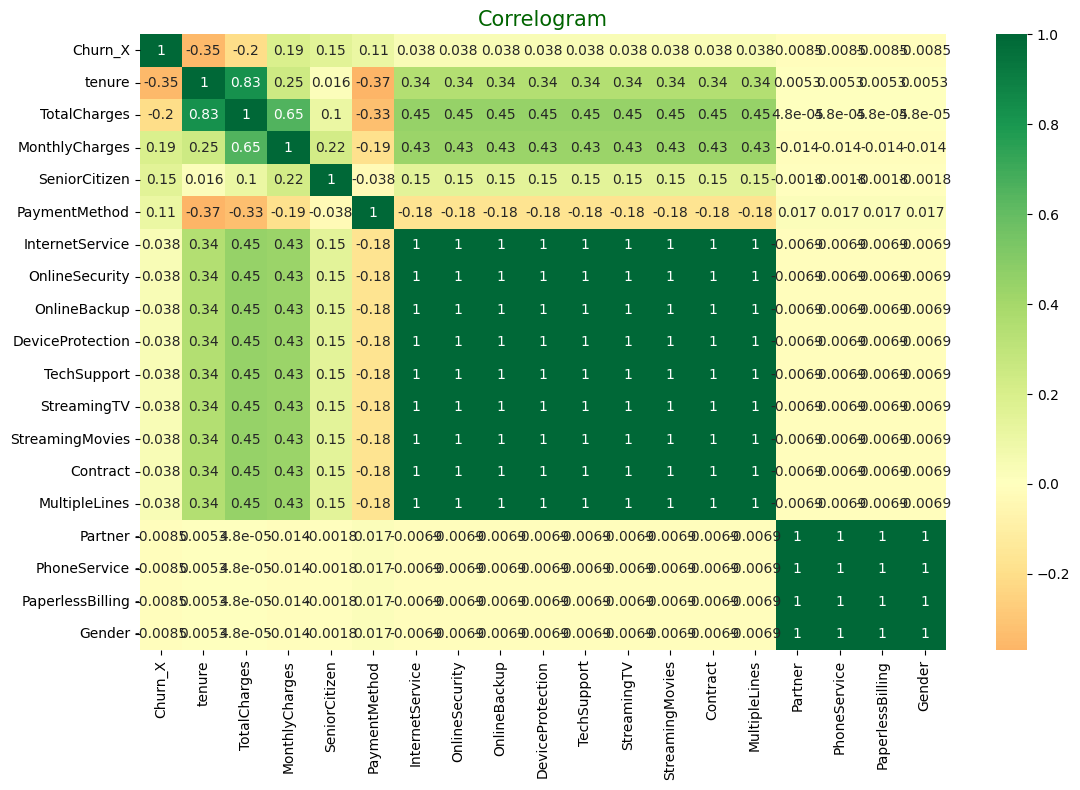

In [45]:
# Quantifying correlations between features
corr = data[list(top_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [46]:
data_x = data[['Churn_X', 'tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen', 'PaymentMethod', 'InternetService']]
data_x.columns

Index(['Churn_X', 'tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen',
       'PaymentMethod', 'InternetService'],
      dtype='object')

In [47]:
data_x.head(7)

,Churn_X,tenure,TotalCharges,MonthlyCharges,SeniorCitizen,PaymentMethod,InternetService
0,0,1,29.85000,29.85000,0,2,1
1,0,34,1889.50000,56.95000,0,3,0
2,1,2,108.15000,53.85000,0,3,0
3,0,45,1840.75000,42.30000,0,0,1
4,1,2,151.65000,70.70000,0,2,0
5,1,8,820.50000,99.65000,0,2,2
6,0,22,1949.40000,89.10000,0,1,2


In [48]:
data_x = pd.DataFrame(data_x)
data_x.columns

Index(['Churn_X', 'tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen',
       'PaymentMethod', 'InternetService'],
      dtype='object')

In [49]:
data_x = data_x.dropna(subset = ['tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen',
       'PaymentMethod', 'InternetService'])

In [50]:
# Splitting the data set; X contains every feature except the target feature, y contains the target feature
X = data_x.drop(['Churn_X'], axis = 1)
y = data_x['Churn_X']

In [51]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

# 

# MODEL BUILDING

LOGISTIC REGRESSION

In [52]:
# Logistic Regression 
C = {"Very strong": 0.01,
     "Moderately strong": 0.1,
     "Medium": 1,
     "Moderately weak": 10,
     "Very weak": 100}

for k, v in C.items():
    lr_reg = LogisticRegression(C = v)
    lr_reg.fit(X_train, y_train)
    print("Train score with ", k, " regularization: ", lr_reg.score(X_train, y_train))
    print("Test score with ", k, " regularization: ", lr_reg.score(X_test, y_test), "\n")


Train score with  Very strong  regularization:  0.7918222222222222
Test score with  Very strong  regularization:  0.7782515991471215 

Train score with  Moderately strong  regularization:  0.7925333333333333
Test score with  Moderately strong  regularization:  0.7839374555792467 

Train score with  Medium  regularization:  0.7904
Test score with  Medium  regularization:  0.7818052594171997 

Train score with  Moderately weak  regularization:  0.7902222222222223
Test score with  Moderately weak  regularization:  0.7839374555792467 

Train score with  Very weak  regularization:  0.7909333333333334
Test score with  Very weak  regularization:  0.7810945273631841 



In [53]:
# Using L1 (Lasso) regularization
lr_L1 = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 0.1)
lr_L1.fit(X_train, y_train)
#plt.plot(lr_L1.coef_.flatten())
print(lr_L1.score(X_train, y_train))
print(lr_L1.score(X_test, y_test))

0.7912888888888889
0.7860696517412935


In [54]:
# Using L2 (Ridge) regularization
lr_L2 = LogisticRegression(C=0.1)
lr_L2.fit(X_train, y_train)
#plt.plot(lr_L2.coef_.flatten())
print(lr_L2.score(X_train, y_train))
print(lr_L2.score(X_test, y_test))

0.7925333333333333
0.7839374555792467


In [55]:
# Saving the scikit-learn model
joblib.dump(lr_L1, "telco.pkl")

['telco.pkl']